Q: What are the most popular flight destinations by quarter?

Supporting Q:
            
    1) Number of passengers during quarter?
    
    2) Breakdown of origin state and dest state (bar)
    
    3) Further breakdown of most popular airports in each destination (bar)
          
    4) Further breakdown of destinations of top 5 origin states (bar)
             
    5) Traffic over time (line)
   
    6) What airports are the busiest?
             
    7) Compare to common layover states (list comparison)
                            
    8) Load onto gmaps heatmap (gmaps using airport code)
             

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import zipfile
import json

In [2]:
zf = zipfile.ZipFile('all_data.zip')
q1_df = pd.read_csv(zf.open('Q12019.csv'))
q2_df = pd.read_csv(zf.open('Q22019.csv'))
q3_df = pd.read_csv(zf.open('Q32019.csv'))
q4_df = pd.read_csv(zf.open('Q42019.csv'))

In [3]:
q1_df.head()

,YEAR,QUARTER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,PASSENGERS,Unnamed: 9
0,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0,NaN
1,2019,1,RIC,VA,Virginia,CLT,NC,North Carolina,1.0,NaN
2,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0,NaN
3,2019,1,RIC,VA,Virginia,CLT,NC,North Carolina,1.0,NaN
4,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0,NaN


In [39]:
q1_dest = q1_df.DEST.value_counts()
qwe = q1_dest.to_dict()

new_q1 = pd.DataFrame.from_dict(qwe, orient='index', columns=["# Passengers"])

In [50]:
new_q1 = new_q1.loc[new_q1["# Passengers"] > 99999]

new_q1

,# Passengers
LAX,203694
ORD,164668
MCO,160411
DEN,156724
ATL,155155
LAS,149517
SFO,149461
SEA,139375
PHX,137474
BOS,134559


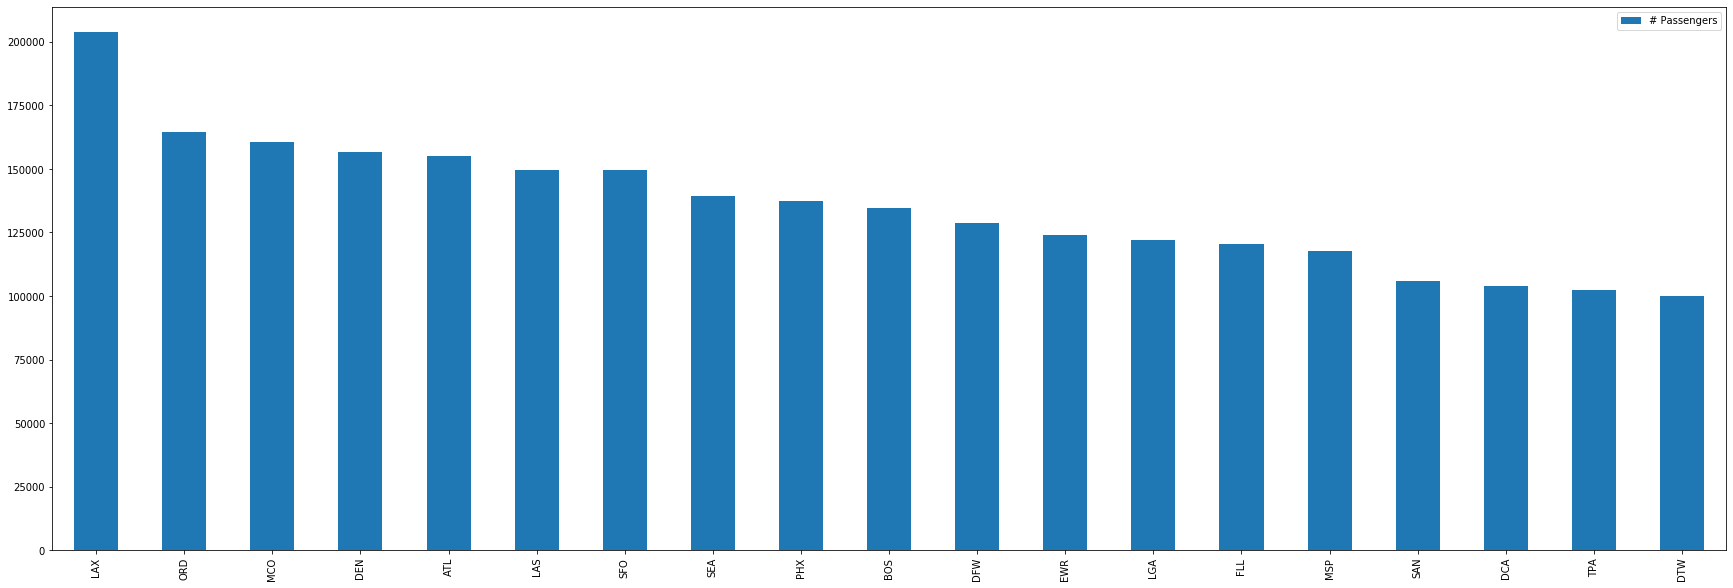

In [51]:
new_q1.plot(kind="bar", figsize=(30,10))

In [70]:
Cleanest_DF["State Destination"].value_counts()

California        780524
Florida           750082
Texas             534965
New York          330258
Virginia          234205
Illinois          225007
Colorado          201999
North Carolina    194305
Georgia           185576
Arizona           183215
Washington        181800
Nevada            178034
Pennsylvania      175500
Michigan          148465
Tennessee         136640
Massachusetts     135997
Missouri          134058
New Jersey        127492
Ohio              126605
Minnesota         126072
Hawaii            121885
Oregon            109846
Utah              102968
Louisiana         100597
Kentucky           86435
Wisconsin          77508
Indiana            74025
South Carolina     73662
Maryland           73645
Oklahoma           52813
Alabama            45588
Connecticut        43559
Nebraska           38392
Montana            36435
Idaho              35735
Alaska             35071
New Mexico         34915
Iowa               33743
Arkansas           32096
Rhode Island       24236


In [65]:
q1_dest_cali = Cleanest_DF.loc[Cleanest_DF["State Destination"] == "California"]

In [66]:
q1_dest_cali

,Year,Quarter,ORIGIN,Abreviated State Name,State Name,Destination,Abreviated State Destination,State Destination,Passengers
841,2019,1,CLT,NC,North Carolina,SAN,CA,California,2.0
842,2019,1,CLT,NC,North Carolina,SAN,CA,California,4.0
843,2019,1,CLT,NC,North Carolina,SAN,CA,California,1.0
844,2019,1,CLT,NC,North Carolina,SAN,CA,California,9.0
845,2019,1,CLT,NC,North Carolina,SAN,CA,California,3.0
...,...,...,...,...,...,...,...,...,...
6508626,2019,1,SAT,TX,Texas,SNA,CA,California,1.0
6508628,2019,1,SAT,TX,Texas,SNA,CA,California,1.0
6508630,2019,1,SAT,TX,Texas,SNA,CA,California,1.0
6508632,2019,1,SAT,TX,Texas,SNA,CA,California,1.0


In [67]:
q1_dest_cali["State Name"].value_counts()

California                                        83895
Texas                                             69955
Florida                                           56438
Washington                                        41648
New York                                          35609
Hawaii                                            29797
Virginia                                          29620
Colorado                                          27402
Illinois                                          27040
Oregon                                            26424
Arizona                                           25549
Nevada                                            24300
Utah                                              20288
Georgia                                           19110
Pennsylvania                                      18793
North Carolina                                    18526
New Jersey                                        17161
Massachusetts                                   

In [56]:
q1_dest_state = Cleanest_DF["State Destination"].value_counts()
q1_dest_state_2 = q1_dest_state.to_dict()

new_q1_dest = pd.DataFrame.from_dict(q1_dest_state_2, orient='index', columns=["# Passengers"])

In [57]:
#new_q1_dest = new_q1_dest.loc[new_q1["# Passengers"] > 99999]

new_q1_dest

,# Passengers
California,780524
Florida,750082
Texas,534965
New York,330258
Virginia,234205
Illinois,225007
Colorado,201999
North Carolina,194305
Georgia,185576
Arizona,183215


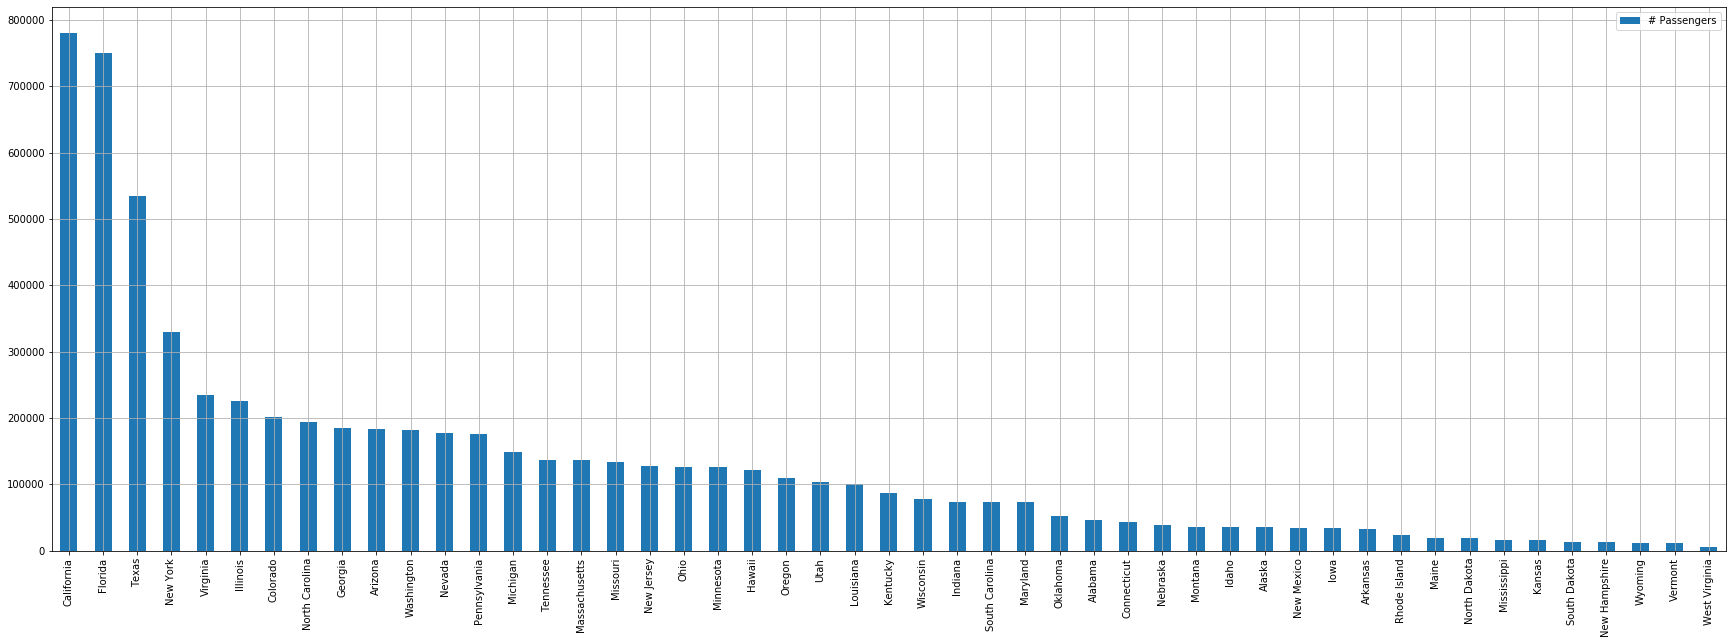

In [62]:
zxc = new_q1_dest.plot(kind="bar", figsize=(30,10))
plt.grid(True)
plt.savefig("yes.png")

In [4]:
q1_df.ORIGIN_STATE_NM.value_counts()

California                                        777698
Florida                                           757173
Texas                                             539946
New York                                          326195
Virginia                                          232079
Illinois                                          226679
Colorado                                          205435
North Carolina                                    197011
Georgia                                           186959
Arizona                                           185340
Nevada                                            180804
Washington                                        179975
Pennsylvania                                      174227
Michigan                                          148961
Tennessee                                         135915
Massachusetts                                     133538
Missouri                                          132157
Minnesota                      

In [5]:
q1_df.DEST_STATE_NM.value_counts()

California                                        780524
Florida                                           750082
Texas                                             534965
New York                                          330258
Virginia                                          234205
Illinois                                          225007
Colorado                                          201999
North Carolina                                    194305
Georgia                                           185576
Arizona                                           183215
Washington                                        181800
Nevada                                            178034
Pennsylvania                                      175500
Michigan                                          148465
Tennessee                                         136640
Massachusetts                                     135997
Missouri                                          134058
New Jersey                     

In [6]:
cali_dest = q1_df[q1_df["DEST_STATE_NM"] == 'California']

In [7]:
cali_dest

,YEAR,QUARTER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_STATE_ABR,DEST_STATE_NM,PASSENGERS,Unnamed: 9
841,2019,1,CLT,NC,North Carolina,SAN,CA,California,2.0,NaN
842,2019,1,CLT,NC,North Carolina,SAN,CA,California,4.0,NaN
843,2019,1,CLT,NC,North Carolina,SAN,CA,California,1.0,NaN
844,2019,1,CLT,NC,North Carolina,SAN,CA,California,9.0,NaN
845,2019,1,CLT,NC,North Carolina,SAN,CA,California,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6508626,2019,1,SAT,TX,Texas,SNA,CA,California,1.0,NaN
6508628,2019,1,SAT,TX,Texas,SNA,CA,California,1.0,NaN
6508630,2019,1,SAT,TX,Texas,SNA,CA,California,1.0,NaN
6508632,2019,1,SAT,TX,Texas,SNA,CA,California,1.0,NaN


In [8]:
# number of passengers from Cali per deestination state in Q1

cali_count_pass = cali_dest.groupby('ORIGIN_STATE_NM').count()['PASSENGERS']

cali_pass = pd.DataFrame({
    'Total Passengers': cali_count_pass
})

In [9]:
cali_pass

,Total Passengers
ORIGIN_STATE_NM,
Alabama,4484
Alaska,3764
Arizona,25549
Arkansas,3664
California,83895
Colorado,27402
Connecticut,4352
Florida,56438
Georgia,19110


In [71]:
# I ran a quick cleaning code.  I used the str() conatins method as it logically makes the most sense to me.  
# I tried various way to do both in the same line of code but I couldn't get it to work
df_cleanQ1 = q1_df[~q1_df.DEST_STATE_NM.str.contains("U.S.")][~q1_df.DEST_STATE_NM.str.contains("Rico")][~q1_df.ORIGIN_STATE_NM.str.contains("U.S.")][~q1_df.ORIGIN_STATE_NM.str.contains("Rico")]
df_cleanQ1.head()
# Verifying the cleaning
df_cleanQ1.DEST_STATE_NM.value_counts()



C:\Users\mhoun\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


California        777182
Florida           740510
Texas             530507
New York          324471
Virginia          231475
Illinois          222279
Colorado          200776
North Carolina    192636
Georgia           183690
Arizona           182494
Washington        181093
Nevada            177327
Pennsylvania      173292
Michigan          146930
Tennessee         135724
Massachusetts     133178
Missouri          132839
Ohio              125101
New Jersey        124821
Minnesota         124560
Hawaii            121594
Oregon            109450
Utah              102400
Louisiana          99809
Kentucky           85634
Wisconsin          76830
Indiana            73286
South Carolina     73148
Maryland           72351
Oklahoma           52502
Alabama            45354
Connecticut        42452
Nebraska           38185
Montana            36393
Idaho              35639
Alaska             35012
New Mexico         34803
Iowa               33445
Arkansas           31936
Rhode Island       23843


In [68]:
#Removing useless column from dataframe
Cleanest_DF = df_cleanQ1[['YEAR', 
                          'QUARTER', 
                          'ORIGIN', 
                          'ORIGIN_STATE_ABR', 
                          'ORIGIN_STATE_NM',
                          'DEST', 
                          'DEST_STATE_ABR', 
                          'DEST_STATE_NM', 
                          'PASSENGERS']]

#Cleaning up the headers for each column

Cleanest_DF = Cleanest_DF.rename(columns={'YEAR': 'Year', 
                                          'QUARTER': 'Quarter', 
                                          'ORIGIN_STATE_ABR': 'Abreviated State Name', 
                                          'ORIGIN_STATE_NM': 'State Name', 
                                          'DEST': 'Destination',
                                          'DEST_STATE_NM': 'State Destination',
                                          'DEST_STATE_ABR': 'Abreviated State Destination', 
                                          'PASSENGERS': 'Passengers'})
Cleanest_DF.head()

,Year,Quarter,ORIGIN,Abreviated State Name,State Name,Destination,Abreviated State Destination,State Destination,Passengers
0,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0
1,2019,1,RIC,VA,Virginia,CLT,NC,North Carolina,1.0
2,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0
3,2019,1,RIC,VA,Virginia,CLT,NC,North Carolina,1.0
4,2019,1,CLT,NC,North Carolina,RIC,VA,Virginia,1.0


In [69]:
Cleanest_DF["State Name"].value_counts()

California                                        774519
Florida                                           747902
Texas                                             535638
New York                                          320632
Virginia                                          229349
Illinois                                          224055
Colorado                                          204205
North Carolina                                    195321
Georgia                                           185097
Arizona                                           184645
Nevada                                            180051
Washington                                        179280
Pennsylvania                                      172137
Michigan                                          147436
Tennessee                                         135009
Missouri                                          130981
Massachusetts                                     130883
Minnesota                      